In [109]:
import numpy as np
import matplotlib.pyplot as plt
n=250
X = np.random.randint(0, 100, n)
Y = X**1.5 + np.random.randint(200, 400, n)

In [110]:
def averageCost(m, q):
    return np.mean(np.sqrt(np.square(Y - q - m*X)))

In [111]:
# getting max alpha possible that doesn't make
# gradient overflow
m, q = 0, 0
alpha = 1
keep = True
gradient_m = np.sum((Y - q - m*X) * X)
gradient_q = np.sum((Y - q - m*X))
costNow = averageCost(m, q)
while keep:
    costThen = averageCost(m+gradient_m*alpha, q+gradient_q*alpha)
    # if new cost is higher than the old one, alpha is too big
    if costThen<costNow:
        keep = False
    else:
        alpha /= 1.1

# doing all of this one more time (with evaluated m and q) just
# to make sure no overflow occurs
m += gradient_m*alpha
q += gradient_q*alpha
keep = True
gradient_m = np.sum((Y - q - m*X) * X)
gradient_q = np.sum((Y - q - m*X))
costNow = averageCost(m, q)
while keep:
    costThen = averageCost(m+gradient_m*alpha, q+gradient_q*alpha)
    if costThen<costNow:
        keep = False
    else:
        alpha /= 1.1

print("obtained alpha is:", alpha)

obtained alpha is: 2.134037925554949e-06


In [112]:
gradientNorm = 1 # just to start the while loop
while gradientNorm>0.1:
    gradient_m = np.sum((Y - q - m*X) * X)
    gradient_q = np.sum((Y - q - m*X))
    m += gradient_m*alpha
    q += gradient_q*alpha  
    gradientNorm = np.sqrt((gradient_m**2)+(gradient_q**2))
print("average cost:", averageCost(m,q))
print("gradient norm:", gradientNorm)
print("m:", m, "q:", q)

average cost: 59.65028609626896
gradient norm: 0.09998913485319334
m: 10.139995160956937 q: 199.29837765033824


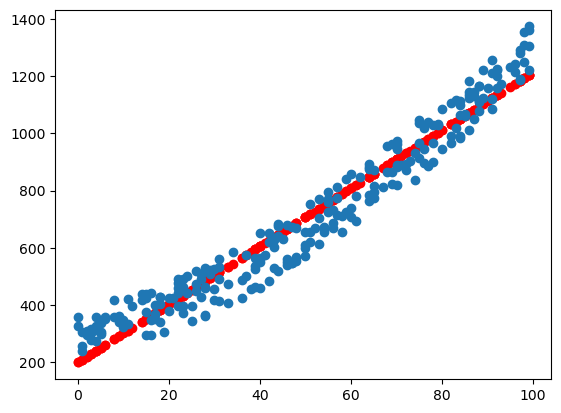

In [113]:
plt.scatter(X, m * X + q, color="red")
plt.scatter(X, Y)
plt.show()